In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import imp
import rpy2.robjects as ro
from rpy2.robjects import numpy2ri

RANDOM_SEED = 0
numpy2ri.activate()
ro.r('set.seed({})'.format(RANDOM_SEED))

import fairtest.utils.log as fairtest_log
imp.reload(fairtest_log)
fairtest_log.set_params(filename='fairtest.log')

In [41]:
import fairtest.investigation as inv
import fairtest.testing as testing
import fairtest.discovery as discovery
import fairtest.error_profiling as error_profiling
import fairtest.modules.metrics as metrics
import fairtest.modules.metrics.correlation as correlation
import fairtest.modules.metrics.regression as regression
import fairtest.modules.metrics.binary_metrics as binary_metrics
import fairtest.modules.statistics.confidence_interval as intervals
import ast
import sklearn.preprocessing as preprocessing
imp.reload(intervals)
imp.reload(inv)
imp.reload(testing)
imp.reload(discovery)
imp.reload(error_profiling)
imp.reload(metrics)
imp.reload(correlation)
imp.reload(binary_metrics)
imp.reload(regression)

'''
dataname = 'adult.csv'
data = pd.read_csv(
            '../data/adult/adult.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data = data.drop('fnlwgt', axis=1)
#data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 'Indian' if 'Indian' in x else x, data['race'])
#data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 'Black & Other' if ('Indian' in x or 'Other' in x or 'Black' in x) else x, data['race'])
#data['hours-per-week'] = map(lambda x: '≥40' if x>=40 else '<40', data['hours-per-week'])
TARGET = 'income'
SENS = ['sex', 'race']
#SENS = ['sex']
EXPL = []
'''

'''
dataname = 'medical.csv'
data = pd.read_csv(
            '../data/medical/predictions_bin_4_25_2.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'Prediction'
GROUND_TRUTH = 'Ground_Truth'
SENS = ['Age']
EXPL = []
'''


dataname = 'medical'
data = pd.read_csv(
            '../data/medical/predictions_reg_log.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'Prediction'
GROUND_TRUTH = 'Ground_Truth'
SENS = ['Age']
EXPL = []

'''
dataname = 'berkeley.csv'
data = pd.read_csv(
            '../data/berkeley/berkeley.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'accepted'
SENS = ['gender']
EXPL = ['department']
#EXPL = []
'''
'''
dataname = 'staples.csv'
data = pd.read_csv(
            '../data/staples/staples.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data = data.drop('zipcode', axis=1)
data = data.drop('distance', axis=1)
data = data.drop('city', axis=1)
TARGET = 'price'
SENS = ['income', 'race']
EXPL = []
data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 
                   'Indian & Alaska Native' if 'Indian' in x  else
                   'Black' if 'Black' in x  else
                   'Hispanic' if 'Latino' in x else
                   'Pacific Islander' if 'Pacific' in x else
                   'White' if 'White' in x else
                   '2+ Races' if 'Two' in x else
                   'Other' if 'Other' in x else
                    x, data['race'])
'''
'''
dataname = 'overfeat.txt'
data = pd.read_csv(
            #'../data/images/lfw_black-white.txt',
            '../data/images/overfeat_raw.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
TARGET = 'Labels'
SENS = ['Race']
EXPL = []
labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
for l in labeled_data:
    assert len(l) == 5
label_encoder = preprocessing.MultiLabelBinarizer()
labeled_data = label_encoder.fit_transform(labeled_data)
labels = label_encoder.classes_
df_labels = pd.DataFrame(labeled_data, columns=labels)
data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
TARGET = labels.tolist()
'''
'''
dataname = 'overfeat.txt'
data = pd.read_csv(
            '../data/images/overfeat_raw.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
TARGET = 'Labels'
SENS = ['Race']
EXPL = []
labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
for l in labeled_data:
    assert len(l) == 5
data['Gorilla'] = map(lambda l: 'Yes' if 'chimpanzee' in l else 'No', labeled_data)    
data = data.drop(TARGET, axis=1)
TARGET = 'Gorilla'
'''
'''
dataname = 'movies.txt'
data = pd.read_csv(
            '../data/recommender/recommendations_labels.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
data=data.rename(columns = {'avgScore':'Avg Movie Rating', 'age': 'Age', 'gender': 'Gender'})
SENS = ['Gender', 'Age']
TARGET = 'Avg Movie Rating'
EXPL = []

data = data.drop(set(['userID', 'occupation', 'Avg Movie Rating', 'RMSE', 'Labels'])-set([TARGET]), axis=1)
if 'Age' in SENS and TARGET == 'Labels':
    data['Age'] = map(lambda a: '<35' if a <35 else '>35', data['Age'])
else:
    data['Age'] = map(lambda a: 10 if a ==1 
                      else 20 if a == 18 
                      else 30 if a == 25 
                      else 40 if a == 35 
                      else 50 if a == 45 or a == 50
                      else 60 if a == 56 else None, data['Age'])

if TARGET == 'Labels':
    labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
    for labels in labeled_data:
        assert(len(labels) == 50)
    label_encoder = preprocessing.MultiLabelBinarizer()
    labeled_data = label_encoder.fit_transform(labeled_data)
    labels = label_encoder.classes_
    df_labels = pd.DataFrame(labeled_data, columns=labels)
    data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
    TARGET = labels.tolist()
'''
'''
dataname = 'movies.txt'
data = pd.read_csv(
            '../data/recommender/recommendations_types.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
data=data.rename(columns = {'Average_age':'Avg Movie Age', 'age': 'Age', 'gender': 'Gender'})
TARGET = 'Avg Movie Age'
SENS = ['Gender', 'Age']
if 'Age' in SENS and TARGET == 'Types':
    data['Age'] = map(lambda a: '<35' if a <35 else '>=35', data['Age'])

EXPL = []
if TARGET == 'Avg Movie Age':
    data = data.drop('Types', axis=1)
    data['Age'] = map(lambda a: 10 if a ==1 
                      else 20 if a == 18 
                      else 30 if a == 25 
                      else 40 if a == 35 
                      else 50 if a == 45 or a == 50
                      else 60 if a == 56 else None, data['Age'])
else:
    labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
    for labels in labeled_data:
        assert(len(labels) == 5)
    label_encoder = preprocessing.MultiLabelBinarizer()
    labeled_data = label_encoder.fit_transform(labeled_data)
    labels = label_encoder.classes_
    df_labels = pd.DataFrame(labeled_data, columns=labels)
    data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
    TARGET = labels.tolist()
'''
'''
dataname = 'benchmark.csv'
data = pd.read_csv(
            '../data/benchmark/benchmark.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'price'
SENS = ['race', 'income']
EXPL = []
'''

#metrics = {'gender': 'Diff'}
metrics = {}
#exp = testing.Testing(data, SENS, TARGET, EXPL, metrics=metrics, train_size=0.5, random_state=RANDOM_SEED)
exp = error_profiling.ErrorProfiling(data, SENS, TARGET, GROUND_TRUTH, EXPL, metrics=metrics, train_size=0.5, random_state=RANDOM_SEED)
#exp = discovery.Discovery(data, SENS, TARGET, EXPL, metrics=metrics, train_size=0.5, topk=35, random_state=RANDOM_SEED)
print len(exp.train_set), len(exp.test_set)
exp.train_set.tail()

INFO:root:New Error Profiling Investigation
INFO:root:Computing Absolute Regression Error
INFO:root:Encoding Feature Gender
INFO:root:Target Feature: Target(names=['Abs. Error'], arity=None)
INFO:root:Training Size 43179 -  Testing Size 43179
INFO:root:Choosing metric CORR for feature Age


43179 43179


,Age,Average Charlson Index,Average Days Since First Service,Average Drug Count,Average Lab Count,Average Length Of Stay,Average Payment Delay,Condition AMI,Condition APPCHOL,Condition ARTHSPIN,...,Treatment Code SIS,Treatment Code SMCD,Treatment Code SMS,Treatment Code SNS,Treatment Code SO,Treatment Code SRS,Treatment Code SUS,Unknown Length Of Stay,Gender,Abs. Error
21243,55,0,1,2.000000,0,0,54,0,0,0,...,0,0,0,0,0,0,0,2,1,0.057004
45891,75,1,4,1.714285,9,0,62,2,0,6,...,0,0,1,0,0,0,0,27,1,0.347734
42613,5,0,1,0.000000,0,0,21,0,0,0,...,0,0,0,0,0,0,0,1,1,2.935230
43567,45,0,1,1.000000,3,0,42,0,0,0,...,0,0,0,0,0,0,0,3,1,0.042563
68268,55,0,2,1.166666,4,0,92,0,0,0,...,0,0,0,0,0,0,0,5,0,0.020174


In [42]:
import fairtest.modules.context_discovery.guided_tree as guided_tree
imp.reload(guided_tree)
inv.train([exp], score_aggregation='avg', min_leaf_size=100, max_depth=5)

INFO:root:Begin training phase with protected feature Age
INFO:root:Building a Guided Decision Tree
INFO:root:splitting on Speciality Pediatrics (score=0.167381499732) with threshold 7.5 at pred []
INFO:root:splitting on Treated at Urgent Care (score=0.165519265104) with threshold 0.5 at pred ['Speciality Pediatrics <= 7.5']
INFO:root:splitting on Condition RESPR4 (score=0.146386059402) with threshold 1.5 at pred ['Speciality Pediatrics <= 7.5', 'Treated at Urgent Care <= 0.5']
INFO:root:splitting on Speciality Pediatrics (score=0.137488381371) with threshold 5.5 at pred ['Speciality Pediatrics <= 7.5', 'Treated at Urgent Care <= 0.5', 'Condition RESPR4 <= 1.5']
INFO:root:splitting on Condition TRAUMA (score=0.136635953518) with threshold 0.5 at pred ['Speciality Pediatrics <= 7.5', 'Treated at Urgent Care <= 0.5', 'Condition RESPR4 <= 1.5', 'Speciality Pediatrics <= 5.5']
INFO:root:splitting on Condition TRAUMA (score=0.15661052318) with threshold 0.5 at pred ['Speciality Pediatrics <

In [43]:
print exp.trained_trees['Age']


               /-Condition TRAUMA <= 0.5
            /-|
         /-|   \-Condition TRAUMA > 0.5
        |  |
        |   \-Speciality Pediatrics > 5.5
      /-|
     |  |      /-Gender = 1
     |  |   /-|
     |  |  |   \-Gender = 0
     |   \-|
     |     |   /-Speciality Laboratory <= 1.5
     |      \-|
   /-|         \-Speciality Laboratory > 1.5
  |  |
  |  |         /-Min Drug Count <= 1.5
  |  |      /-|
  |  |     |   \-Min Drug Count > 1.5
  |  |   /-|
--|  |  |  |   /-Speciality Pediatrics <= 0.5
  |   \-|   \-|
  |     |      \-Speciality Pediatrics > 0.5
  |     |
  |      \-Condition RESPR4 > 7.5
  |
  |   /-Condition MSC2a3 <= 5.5
   \-|
     |   /-Drug Months <= 0.5
      \-|
         \-Drug Months > 0.5


In [44]:
import fairtest.modules.statistics.hypothesis_test as tests
import fairtest.modules.statistics.multiple_testing as multitest
import fairtest.modules.context_discovery.tree_parser as tree_parser
import fairtest.modules.statistics.confidence_interval as intervals
imp.reload(tests)
imp.reload(multitest)
imp.reload(tree_parser)
imp.reload(intervals)

inv.test([exp], exact=True, prune_insignificant=True)

INFO:root:Begin testing phase
INFO:root:Testing 28 hypotheses


Commit Hash: 	06a56774982efbb58bc65a8a17b119cfe37325b7

Dataset: medical
Train Size: 43179
Test Size: 43179
S: ['Age']
X: ['Stdev Length Of Stay', 'Treated at Home', 'Supressed
	Length Of Stay', 'Condition RENAL1', 'No Lab Count',
	'Condition RENAL3', 'Condition RENAL2', 'Speciality
	Diagnostic Imaging', 'Lab Months', 'Number Of Claims', 'No
	Drug Count', 'Range Charlson IndexI_range', 'Number of
	Vendors', 'Number Of Specialties', 'Treated at Outpatient
	Hospital', 'Treatment Code RAD', 'Number of Procedure
	Groups', 'Condition INFEC4', 'Max Lab Count', 'Average Lab
	Count', 'Treated at Office', 'Condition PERVALV', 'Number of
	Places Where Treated', 'Condition FXDISLC', 'Condition
	SEIZURE', 'Treatment Code SMCD', 'Treatment Code EM',
	'Average Drug Count', 'Condition HEMTOL', 'Speciality NULL',
	'Condition FLaELEC', 'Treatment Code SNS', 'Treatment Code
	SUS', 'Number of Primary Physicians', 'Condition NEUMENT',
	'Speciality Laboratory', 'Speciality Other', 'Average
	Payment Delay',

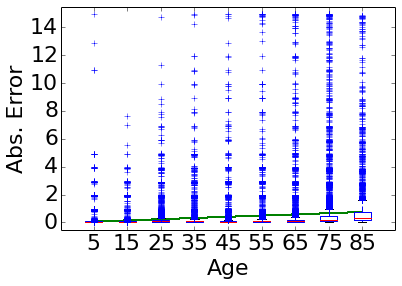

p-value = 2.80e-179 ; CORR = [0.1462, 0.1755]

Sub-Population of size 790
Context = {'Condition RESPR4': (-inf, 7.5], 'Gender': 'male', 'Treated at Urgent Care': (0.5, inf), 'Speciality Pediatrics': (-inf, 7.5], 'Min Drug Count': (1.5, inf)}



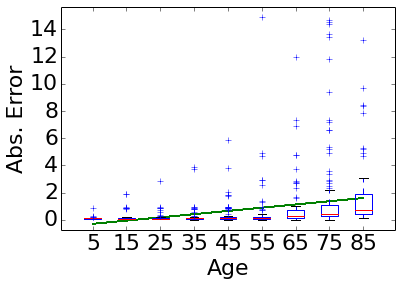

p-value = 1.10e-03 ; CORR = [0.2446, 0.3686]
--------------------------------------------------------------------------------

Sub-Population of size 9308
Context = {'Speciality Pediatrics': (-inf, 7.5], 'Treated at Urgent Care': (0.5, inf)}



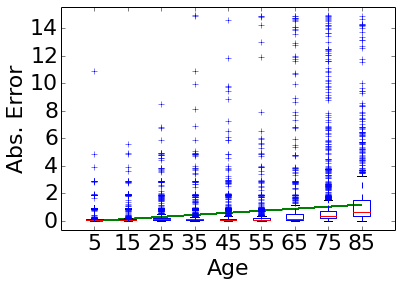

p-value = 5.51e-116 ; CORR = [0.2035, 0.2647]
--------------------------------------------------------------------------------

Sub-Population of size 42780
Context = {'Speciality Pediatrics': (-inf, 7.5]}



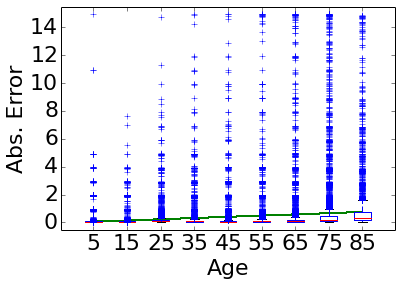

p-value = 2.80e-179 ; CORR = [0.1474, 0.1768]
--------------------------------------------------------------------------------

Hierarchical printing of subpopulations (summary)


 Context = {} ; CI = [0.1462, 0.1755] ; Size = 43179
   Context = {'Speciality Pediatrics': (-inf, 7.5]} ; CI = [0.1474, 0.1768] ; Size = 42780
     Context = {'Speciality Pediatrics': (-inf, 7.5], 'Treated at Urgent Care': (0.5, inf)} ; CI = [0.2035, 0.2647] ; Size = 9308
       Context = {'Condition RESPR4': (-inf, 7.5], 'Gender': 'male', 'Treated at Urgent Care': (0.5, inf), 'Speciality Pediatrics': (-inf, 7.5], 'Min Drug Count': (1.5, inf)} ; CI = [0.2446, 0.3686] ; Size = 790
--------------------------------------------------------------------------------



[{},
 {'Speciality Pediatrics': (-inf, 7.5]},
 {'Speciality Pediatrics': (-inf, 7.5], 'Treated at Urgent Care': (0.5, inf)},
 {'Condition RESPR4': (-inf, 7.5],
  'Gender': 'male',
  'Min Drug Count': (1.5, inf),
  'Speciality Pediatrics': (-inf, 7.5],
  'Treated at Urgent Care': (0.5, inf)}]

In [45]:
import fairtest.modules.bug_report.report as rep
import fairtest.modules.bug_report.filter_rank as fr
imp.reload(rep)
imp.reload(inv)
imp.reload(fr)

inv.report([exp], dataname, level=0.95, output_dir=None, node_filter=fr.FILTER_BETTER_THAN_ANCESTORS)